# Exploratory analysis speakers aggregations

This notebook uses newspaper metatdata retrieved using WHOIS requests and classified quotes to show some information about colloquial language use accross quotes sources indicators

## 0 Dependencies

In [4]:
import numpy as np
import pandas as pd
import bz2
import json
import seaborn as sns
import matplotlib.pyplot as plt
from whois import whois
from tqdm import tqdm
tqdm.pandas()

In [5]:
# Small adjustments to default style of plots, making sure it's readable and colorblind-friendly everywhere
plt.style.use('seaborn-colorblind')
plt.rcParams.update({'font.size' : 14,
                     'figure.figsize':(20,7)})

## 1 Data loading

In [6]:
df= pd.read_json("/Users/nicolasantacroce/Desktop/Desktop/EPFL/EPFL MA1/Applied Data Analysis/Sample_classified_1Mio_v1.json.bz2",compression="bz2",lines=True)

In [7]:
df["domain"]= df['urls'].apply(lambda x: "/".join(x[0].split('/',3)[:3]))

In [8]:
df_domain= pd.read_pickle("./whois_result.pkl")
df_domain.head(10)

,domain,count,org,country,state,city
0,http://www.breitbart.com,5220,"Domains By Proxy, LLC",US,Arizona,Tempe
1,http://www.msn.com,4505,Microsoft Corporation,US,WA,Redmond
2,http://home.nzcity.co.nz,4372,None,None,None,None
3,http://www.stuff.co.nz,3766,None,None,None,None
4,https://www.thesun.co.uk,3726,None,None,None,None
5,http://msn.com,3649,Microsoft Corporation,US,WA,Redmond
6,http://express.co.uk,3487,None,None,None,None
7,http://mlb.mlb.com,3189,"MLB Advanced Media, LP",US,NY,New York
8,http://thehill.com,3142,None,US,FL,Jacksonville
9,https://www.seattletimes.com,3012,SEATTLE TIMES COMPANY,US,WA,SEATTLE


In [9]:
df= df.join(df_domain.set_index('domain'), on='domain')
del df["count"]
df.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,p1,p2,delta_p,year,colloquial,domain,org,country,state,city
0,2015-11-11-109291,They'll call me lots of different things. Libe...,Chris Christie,[Q63879],2015-11-11 00:55:12,1,"[[Chris Christie, 0.7395], [Bobby Jindal, 0.15...",[http://thehill.com/blogs/ballot-box/259760-ch...,E,0.7395,0.1505,0.5890,2015,0,http://thehill.com,None,US,FL,Jacksonville
1,2015-09-11-070666,It's kind of the same way it's been with the R...,Niklas Kronwall,[Q722939],2015-09-11 19:54:00,1,"[[Niklas Kronwall, 0.7119], [None, 0.2067], [H...",[http://redwings.nhl.com/club/news.htm?id=7787...,E,0.7119,0.2067,0.5052,2015,0,http://redwings.nhl.com,REDACTED FOR PRIVACY,US,NY,REDACTED FOR PRIVACY
2,2015-11-09-033345,I had a chuckle: They were showing a video of ...,Kris Draper,[Q948695],2015-11-09 00:57:45,3,"[[Kris Draper, 0.8782], [None, 0.1043], [Serge...",[http://ca.rd.yahoo.com/sports/rss/nfl/SIG=13u...,E,0.8782,0.1043,0.7739,2015,1,http://ca.rd.yahoo.com,None,None,None,None
3,2015-09-05-038628,New Zealand will go in with a lot of confidenc...,John Eales,[Q926351],2015-09-05 02:40:10,3,"[[John Eales, 0.7896], [None, 0.2006], [Toutai...",[http://www.stuff.co.nz/sport/rugby/all-blacks...,E,0.7896,0.2006,0.5890,2015,0,http://www.stuff.co.nz,None,None,None,None
4,2015-02-11-042325,In his suicide note he even made a joke thanki...,Pat Buckley,"[Q19956564, Q23006312, Q7143252, Q7143253]",2015-02-11 09:59:09,1,"[[Pat Buckley, 0.8816], [None, 0.1184]]",[http://independent.ie/life/health-wellbeing/m...,E,0.8816,0.1184,0.7632,2015,1,http://independent.ie,None,None,None,None


## 2 Getting percent of colloquial quotes by organisation

In [18]:
df_org_sum= (df[["org","colloquial"]][df["org"].apply(lambda x: isinstance(x, str))]).groupby(["org"])\
.apply(lambda x : x.sum()).sort_values(["colloquial"], ascending=False)
del df_org_sum["org"]
df_org_count= (df[["org","colloquial"]][df["org"].apply(lambda x: isinstance(x, str))]).groupby(["org"])\
.apply(lambda x : x.count()).sort_values(["colloquial"], ascending=False)
del df_org_count["org"]
df_grouped_org= pd.merge(df_org_count, df_org_sum, left_index=True, right_index=True).reset_index()
df_grouped_org["colloquial_share"]= df_grouped_org["colloquial_y"]/df_grouped_org["colloquial_x"]
df_grouped_org.rename(columns = {"colloquial_x":'count', 'colloquial_y':'sum'}, inplace = True)
df_grouped_org.head()

,org,count,sum,colloquial_share
0,REDACTED FOR PRIVACY,29093,8934,0.307084
1,"Domains By Proxy, LLC",17518,5966,0.340564
2,Whois Privacy Service,10431,3403,0.326239
3,Privacy service provided by Withheld for Priva...,9651,3496,0.362242
4,"MediaNews Group, Inc",7616,2016,0.264706


[Text(0, 0.5, 'Number of quotations'), Text(0.5, 0, 'Registered Organisation')]

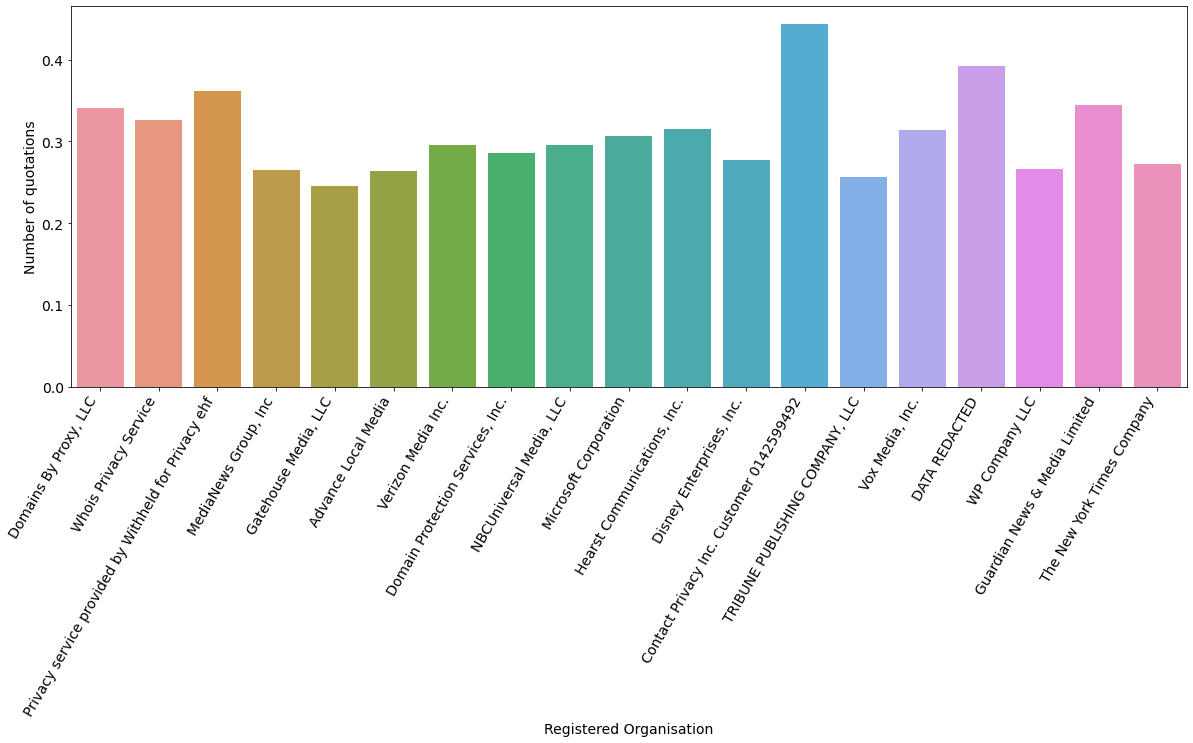

In [21]:
ax = sns.barplot(x="org", y="colloquial_share",data=df_grouped_org[1:20])
plt.xticks(rotation=60, ha='right')
ax.set(ylabel='Number of quotations',xlabel="Registered Organisation")

## 3 Getting percent of colloquial quotes by country

In [22]:
df_country_sum= (df[["country","colloquial"]][df["country"].apply(lambda x: isinstance(x, str))]).groupby(["country"])\
.apply(lambda x : x.sum()).sort_values(["colloquial"], ascending=False)
del df_country_sum["country"]
df_country_count= (df[["country","colloquial"]][df["country"].apply(lambda x: isinstance(x, str))]).groupby(["country"])\
.apply(lambda x : x.count()).sort_values(["colloquial"], ascending=False)
del df_country_count["country"]
df_grouped_country= pd.merge(df_country_count, df_country_sum, left_index=True, right_index=True).reset_index()
df_grouped_country["colloquial_share"]= df_grouped_country["colloquial_y"]/df_grouped_country["colloquial_x"]
df_grouped_country.rename(columns = {"colloquial_x":'count', 'colloquial_y':'sum'}, inplace = True)
df_grouped_country.head()

,country,count,sum,colloquial_share
0,US,246539,74769,0.303275
1,CA,19783,6836,0.345549
2,IN,17276,7500,0.434128
3,GB,15602,5308,0.340213
4,IS,9672,3503,0.362179


[Text(0, 0.5, 'Number of quotations'), Text(0.5, 0, 'Registered Country')]

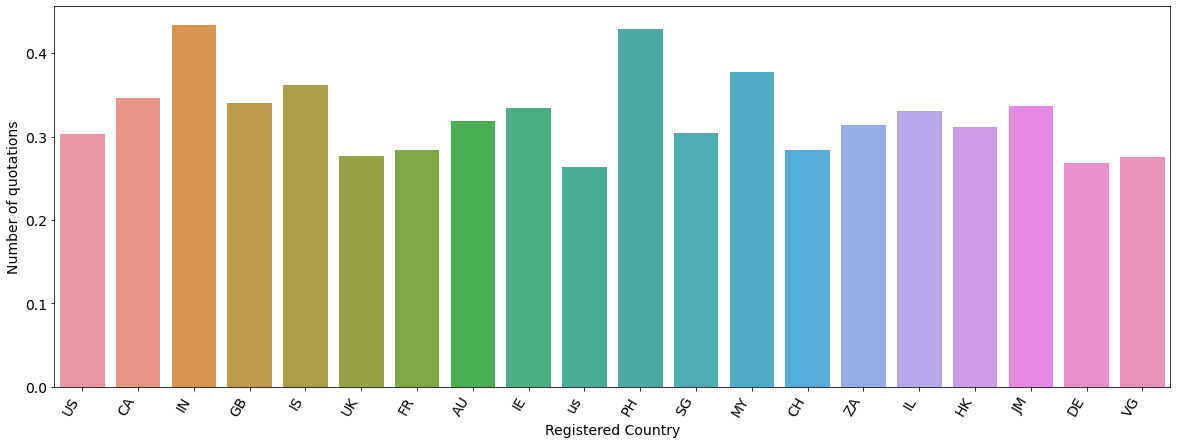

In [28]:
ax = sns.barplot(x="country", y="colloquial_share",data=df_grouped_country[:20])
plt.xticks(rotation=60, ha='right')
ax.set(ylabel='Number of quotations',xlabel="Registered Country")

## 4 Getting percent of colloquial quotes by state

In [25]:
df_state_sum= (df[["state","colloquial"]][df["state"].apply(lambda x: isinstance(x, str))]).groupby(["state"])\
.apply(lambda x : x.sum()).sort_values(["colloquial"], ascending=False)
del df_state_sum["state"]
df_state_count= (df[["state","colloquial"]][df["state"].apply(lambda x: isinstance(x, str))]).groupby(["state"])\
.apply(lambda x : x.count()).sort_values(["colloquial"], ascending=False)
del df_state_count["state"]
df_grouped_state= pd.merge(df_state_count, df_state_sum, left_index=True, right_index=True).reset_index()
df_grouped_state["colloquial_share"]= df_grouped_state["colloquial_y"]/df_grouped_state["colloquial_x"]
df_grouped_state.rename(columns = {"colloquial_x":'count', 'colloquial_y':'sum'}, inplace = True)
df_grouped_state.head()

,state,count,sum,colloquial_share
0,NY,49658,14429,0.290567
1,WA,20646,6491,0.314395
2,CA,20395,6742,0.330571
3,Arizona,18572,6297,0.339059
4,ON,14315,5025,0.351030


[Text(0, 0.5, 'Number of quotations'), Text(0.5, 0, 'Registered State')]

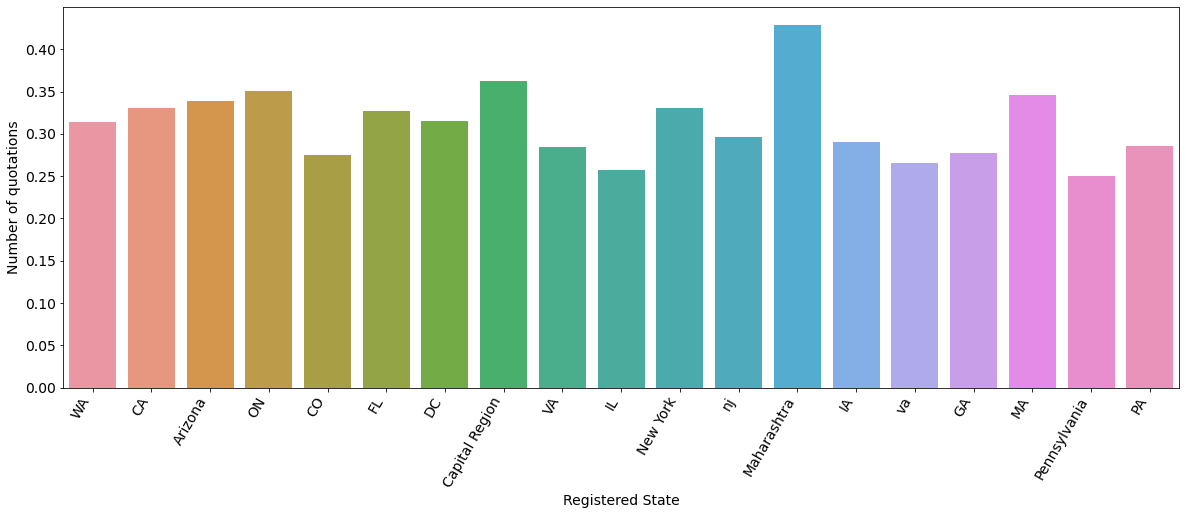

In [26]:
ax = sns.barplot(x="state", y="colloquial_share",data=df_grouped_state[1:20])
plt.xticks(rotation=60, ha='right')
ax.set(ylabel='Number of quotations',xlabel="Registered State")

## 5 Getting percent of colloquial quotes by city

In [17]:
df_city_sum= (df[["city","colloquial"]][df["city"].apply(lambda x: isinstance(x, str))]).groupby(["city"])\
.apply(lambda x : x.sum()).sort_values(["colloquial"], ascending=False)
del df_city_sum["city"]
df_city_count= (df[["city","colloquial"]][df["city"].apply(lambda x: isinstance(x, str))]).groupby(["city"])\
.apply(lambda x : x.count()).sort_values(["colloquial"], ascending=False)
del df_city_count["city"]
df_grouped_city= pd.merge(df_city_count, df_city_sum, left_index=True, right_index=True).reset_index()
df_grouped_city["colloquial_share"]= df_grouped_city["colloquial_y"]/df_grouped_city["colloquial_x"]
df_grouped_city.rename(columns = {"colloquial_x":'count', 'colloquial_y':'sum'}, inplace = True)
df_grouped_city.head()

,city,count,sum,colloquial_share
0,REDACTED FOR PRIVACY,41029,12935,0.315265
1,New York,29608,8538,0.288368
2,Tempe,16510,5565,0.337068
3,Denver,13152,3612,0.274635
4,Toronto,11234,4125,0.367189


[Text(0, 0.5, 'Number of quotations'), Text(0.5, 0, 'Registered State')]

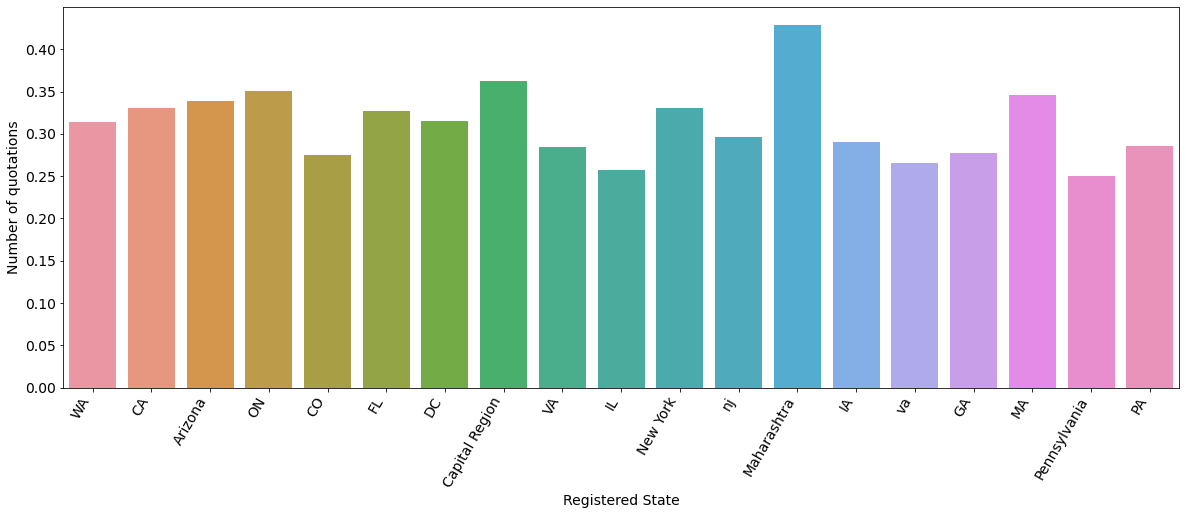

In [27]:
ax = sns.barplot(x="state", y="colloquial_share",data=df_grouped_state[1:20])
plt.xticks(rotation=60, ha='right')
ax.set(ylabel='Number of quotations',xlabel="Registered State")